In [1]:
import pandas as pd

from statsmodels.tsa.arima_model import ARIMA

import matplotlib.pyplot as plt

In [2]:
seriecont = pd.read_csv("notebook_serie-contaminacion.csv", index_col="fecha",
                        parse_dates=["fecha"], date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m-%d')).asfreq('d')

meteo_real = pd.read_csv("var-meteo-train.csv", index_col="date",
                        parse_dates=["date"], date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m-%d')).asfreq('d')

meteo_pred = pd.read_csv("var-meteo-test.csv", index_col="date",
                         parse_dates=["date"], date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m-%d')).asfreq('d')

In [3]:
meteo_real = meteo_real.drop("date_gen", axis=1)
meteo_pred = meteo_pred.drop("date_gen", axis=1)

In [4]:
seriecont = seriecont[meteo_real.index.min():meteo_pred.index.max()]

In [5]:
meteo_real.head()

,var4571,var9886,var8446,var5201,var3497,var11758,var6383,var3485,var8470,var16165,var8518,var3494,var8434,var8422,var7286,var9982,var9636,var8398,var16150,var4545
date,,,,,,,,,,,,,,,,,,,,
2015-07-02,1536.03,212.7,55.0,1042.926667,5.731250,346.1,92266.2,6.925000,39.3,7987.500,37.9,10.3,45.4,47.4,35.0,217.3,1.627673,61.3,13500.0,2089.982500
2015-07-03,1559.85,212.4,59.5,1136.186667,7.340625,316.2,92378.7,8.133333,49.3,11725.000,63.9,9.5,43.4,59.5,40.0,211.4,1.551026,72.5,19000.0,2096.674167
2015-07-04,1572.43,212.6,53.3,916.513333,5.209375,310.3,92408.5,5.791667,47.1,7012.500,45.2,7.9,47.4,53.3,37.0,209.7,1.688710,54.6,11300.0,2099.946667
2015-07-05,1553.66,212.9,49.7,952.100000,5.243750,321.9,92323.7,6.866667,42.1,9000.000,35.3,8.5,34.7,49.7,37.0,210.1,1.457166,48.8,12800.0,2093.497500
2015-07-06,1559.65,212.0,39.6,1147.200000,4.612500,308.4,92270.4,6.208333,32.5,8750.025,27.6,7.4,32.1,39.6,30.0,210.4,1.273833,51.9,22000.0,2094.529167


In [6]:
meteo_pred.head()

,var4571,var9886,var8446,var5201,var3497,var11758,var6383,var3485,var8470,var16165,var8518,var3494,var8434,var8422,var7286,var9982,var9636,var8398,var16150,var4545
date,,,,,,,,,,,,,,,,,,,,
2017-01-01,1564.42,213.2,20.5,147.766667,1.812500,286.4,92428.3,1.991667,9.7,150.0,24.0,2.8,20.5,4.6,35.0,219.6,3.992977,26.0,1000.0,1996.752500
2017-01-02,1494.12,212.9,59.7,151.346667,1.996875,282.1,92336.4,2.150000,52.1,312.5,62.1,3.6,47.9,59.7,58.0,219.4,3.417690,76.8,1100.0,2004.617500
2017-01-03,1536.54,211.6,96.2,140.840000,2.193750,289.8,92774.1,3.108333,75.6,650.0,66.4,5.2,86.9,96.2,75.0,215.6,3.211202,99.7,1700.0,2055.654167
2017-01-04,1564.45,210.7,84.9,167.093333,2.621875,289.8,92962.0,3.416667,74.4,737.5,81.8,4.6,67.4,68.0,78.0,215.3,2.926007,65.7,1600.0,2054.775833
2017-01-05,1556.12,210.3,47.5,149.006667,1.946875,287.7,92861.5,2.158333,43.4,0.0,64.4,2.2,21.2,21.5,60.0,212.3,3.548741,28.6,1000.0,2053.389167


In [7]:
scatter = pd.merge(seriecont, meteo_real, left_index=True, right_index=True)
scatter.head()

,medida,var4571,var9886,var8446,var5201,var3497,var11758,var6383,var3485,var8470,...,var8518,var3494,var8434,var8422,var7286,var9982,var9636,var8398,var16150,var4545
fecha,,,,,,,,,,,,,,,,,,,,,
2015-07-02,110.50,1536.03,212.7,55.0,1042.926667,5.731250,346.1,92266.2,6.925000,39.3,...,37.9,10.3,45.4,47.4,35.0,217.3,1.627673,61.3,13500.0,2089.982500
2015-07-03,114.50,1559.85,212.4,59.5,1136.186667,7.340625,316.2,92378.7,8.133333,49.3,...,63.9,9.5,43.4,59.5,40.0,211.4,1.551026,72.5,19000.0,2096.674167
2015-07-04,124.75,1572.43,212.6,53.3,916.513333,5.209375,310.3,92408.5,5.791667,47.1,...,45.2,7.9,47.4,53.3,37.0,209.7,1.688710,54.6,11300.0,2099.946667
2015-07-05,113.00,1553.66,212.9,49.7,952.100000,5.243750,321.9,92323.7,6.866667,42.1,...,35.3,8.5,34.7,49.7,37.0,210.1,1.457166,48.8,12800.0,2093.497500
2015-07-06,102.50,1559.65,212.0,39.6,1147.200000,4.612500,308.4,92270.4,6.208333,32.5,...,27.6,7.4,32.1,39.6,30.0,210.4,1.273833,51.9,22000.0,2094.529167


Text(0,0.5,'Meteo var 9886')

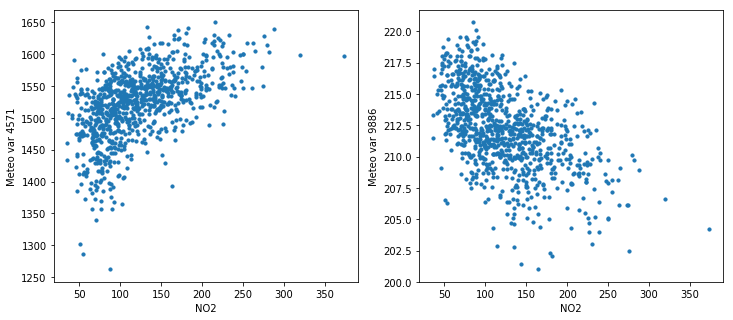

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(121) 
plt.scatter(scatter.medida, scatter.var4571, s=10)
plt.xlabel("NO2")
plt.ylabel("Meteo var 4571")

plt.subplot(122) 
plt.scatter(scatter.medida, scatter.var9886, s=10)
plt.xlabel("NO2")
plt.ylabel("Meteo var 9886")

In [9]:
ini_forecast = pd.Timestamp("2017-01-01", freq="D")
ndays = 7

end_forecast = ini_forecast + ndays - 1

In [10]:
forecast_daily = []
for d in range(ndays):
    ini_test = ini_forecast + d
    modelconf_day = ARIMA(seriecont[:ini_test - 1], order=(2,1,2), freq="D")
    modelfit_day = modelconf_day.fit()
    forecast_daily.append(modelfit_day.forecast(1)[0])

forecast_daily = pd.DataFrame(forecast_daily, columns=["forecast"], 
                              index=seriecont[ini_forecast:end_forecast].index)

In [11]:
forecast_daily_meteo = []
for d in range(ndays):
    ini_test = ini_forecast + d
    modelconf_day = ARIMA(seriecont[:ini_test-1], order=(1,0,1), freq="D",
                          exog = meteo_real[:ini_test-1])
    modelfit_day = modelconf_day.fit()
    forecast_daily_meteo.append(modelfit_day.forecast(1, exog=meteo_pred[ini_test:ini_test])[0])

forecast_daily_meteo = pd.DataFrame(forecast_daily_meteo, columns=["forecast"], 
                                    index=seriecont[ini_forecast:end_forecast].index)

(70, 290.05)

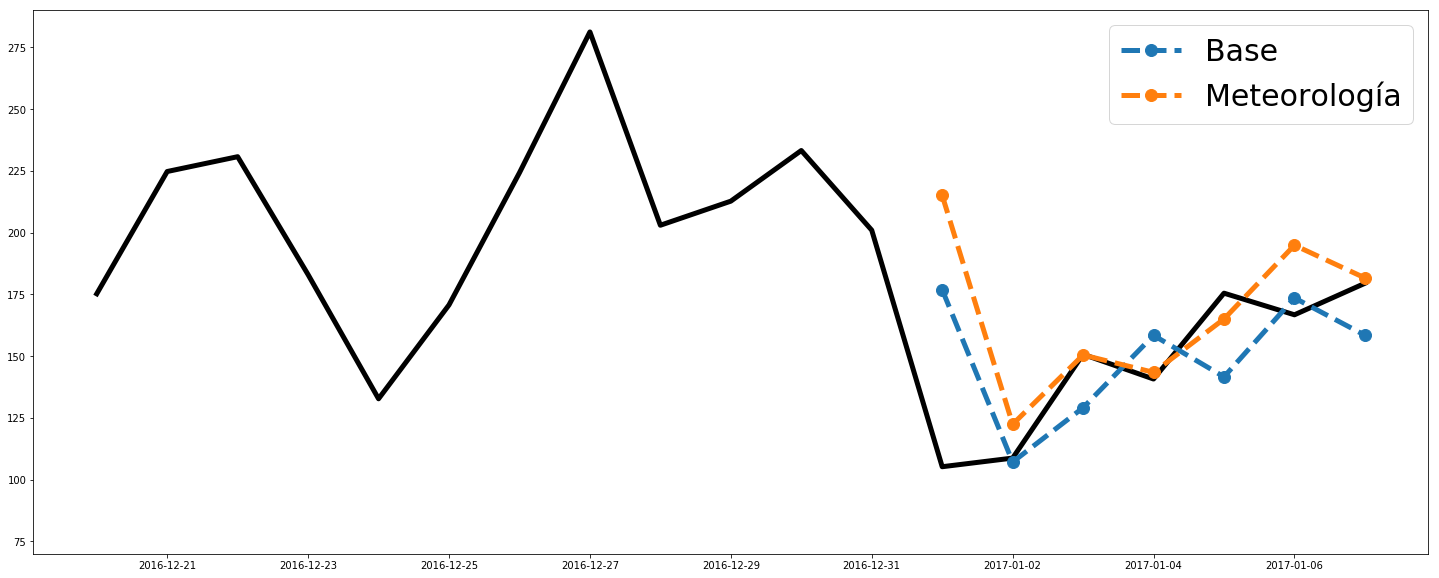

In [12]:
plt.figure(figsize=(25, 10))
plt.plot(seriecont[ini_forecast-12:end_forecast], linewidth=5, color="black")
plt.plot(forecast_daily, linewidth=5, linestyle="--", markersize=12, marker='o', label="Base")
plt.plot(forecast_daily_meteo, linewidth=5, linestyle="--", markersize=12, marker='o', label="Meteorología")
plt.legend(prop={'size': 30})
plt.ylim(bottom=70)

(70, 290.05)

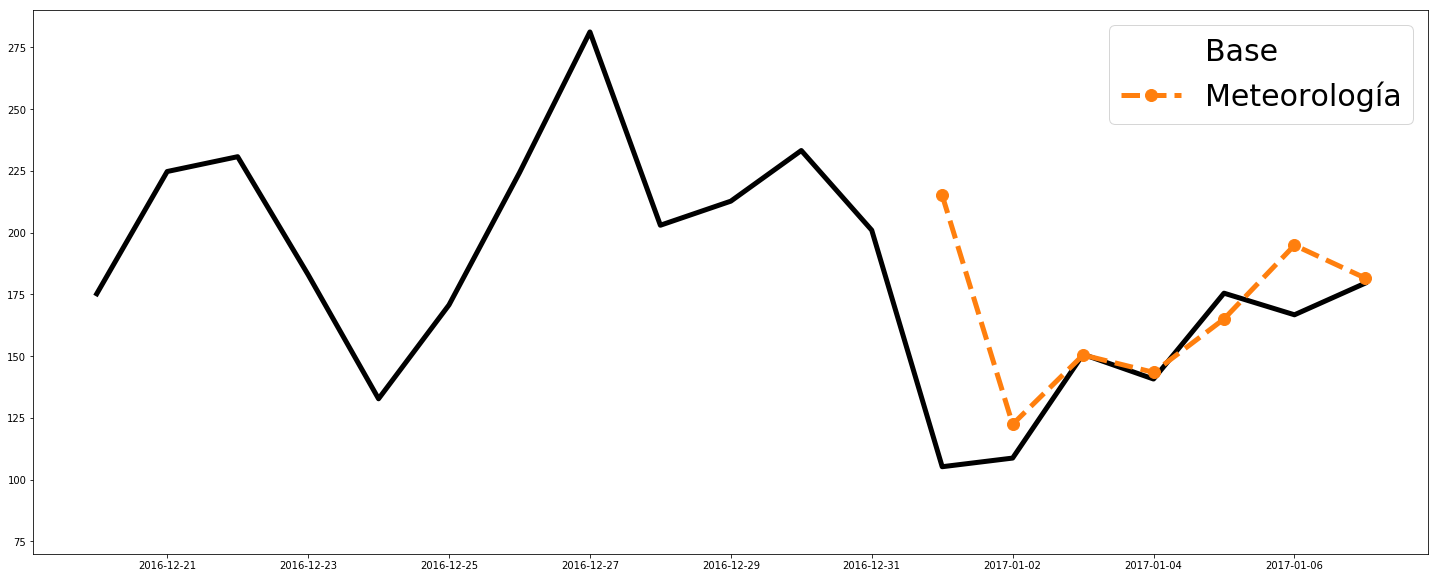

In [13]:
plt.figure(figsize=(25, 10))
plt.plot(seriecont[ini_forecast-12:end_forecast], linewidth=5, color="black")
plt.plot(forecast_daily, linewidth=0, linestyle="--", markersize=0, marker='o', label="Base")
plt.plot(forecast_daily_meteo, linewidth=5, linestyle="--", markersize=12, marker='o', label="Meteorología")
plt.legend(prop={'size': 30})
plt.ylim(bottom=70)